In [24]:
import json
import matplotlib.pyplot as plt
import time

from collections import deque
from IPython.display import display, clear_output
from datetime import datetime, timedelta
from kafka import KafkaConsumer

In [2]:
KAFKA_TOPIC = "data-viz"
KAFKA_BROKER = "localhost:9092"

consumer = KafkaConsumer(KAFKA_TOPIC, bootstrap_servers=KAFKA_BROKER, auto_offset_reset='earliest')

In [11]:
for msg in consumer:
    data = json.loads(msg.value)
    price = data['price']
    dt = data['timestamp']
    print(f"Received ({dt}, {price})")
    time.sleep(0.5)

Received (2023-12-01T09:14:00, 44.44013070624982)
Received (2023-12-01T09:15:00, 57.10727274664653)
Received (2023-12-01T09:16:00, 54.06631015731337)
Received (2023-12-01T09:17:00, 51.2919248879184)
Received (2023-12-01T09:18:00, 46.983781849445116)


KeyboardInterrupt: 

KeyboardInterrupt: 

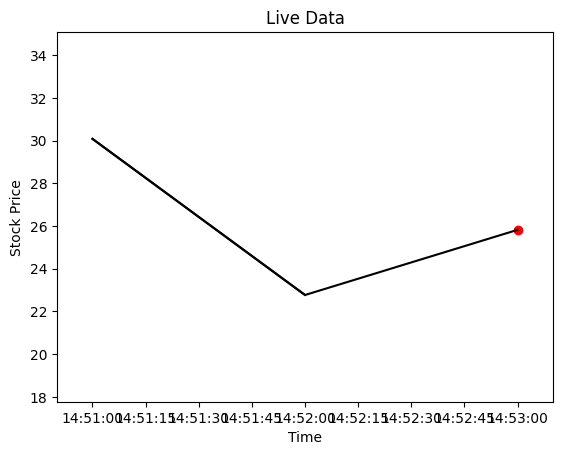

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Live Data')
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')

max_history = 20
x_stream = deque(maxlen=max_history)
y_stream = deque(maxlen=max_history)
red_dot, = ax.plot([], [], 'ro')
for msg in consumer:
    data = json.loads(msg.value)
    price = data['price']
    timestamp = data['timestamp']
    dt = datetime.fromisoformat(timestamp)
    x_stream.append(dt)
    y_stream.append(price)
    red_dot.set_xdata(dt)
    red_dot.set_ydata(price)
    ax.plot(x_stream, y_stream, 'k-')
    ax.set_xlim(
        min(x_stream)-timedelta(seconds=10), 
        max(x_stream)+timedelta(seconds=10))
    ax.set_ylim(min(y_stream)-5, max(y_stream)+5)

    display(fig)
    clear_output(wait=True)
    time.sleep(1)
